In [75]:
#ref: https://www.kaggle.com/code/msripooja/steps-to-convert-audio-clip-to-spectrogram
import os
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as io
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.losses import CategoricalCrossentropy
from keras.models import Sequential
from keras.layers import GRU, LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Activation, TimeDistributed

#to play audio
import IPython.display as ipd

audio_carro_path = "./audioset/carros/"
audio_moto_path = "./audioset/motocicletas/" #caminho onde estão os arquivos de audio
audio_serra_path = "./audioset/motosserras/"

spec_base_path = "./audioset/mfcc_vetor"
spec_carro_path = os.path.join(spec_base_path, "carros")
spec_moto_path = os.path.join(spec_base_path, "motocicletas")
spec_serra_path = os.path.join(spec_base_path, "motosserras")
 
os.makedirs(spec_base_path, exist_ok=True)
os.makedirs(spec_carro_path, exist_ok=True)
os.makedirs(spec_moto_path, exist_ok=True)
os.makedirs(spec_serra_path, exist_ok=True)

In [121]:
audio_carro_clips = sorted(os.listdir(audio_carro_path))[:250]
print(f"Número de arquivos .wav na pasta {audio_carro_path}= ",len(audio_carro_clips))

audio_moto_clips = sorted(os.listdir(audio_moto_path))[:250]
print(f"Número de arquivos .wav na pasta {audio_moto_path}= ",len(audio_moto_clips))

audio_serra_clips = sorted(os.listdir(audio_serra_path))[:500]
print(f"Número de arquivos .wav na pasta {audio_serra_path}= ",len(audio_serra_clips))

Número de arquivos .wav na pasta ./audioset/carros/=  250
Número de arquivos .wav na pasta ./audioset/motocicletas/=  250
Número de arquivos .wav na pasta ./audioset/motosserras/=  500


In [122]:
#aqui está selecionando o primeiro arquivo da lista, pode ser feito um for para pegar todos de uma vez
#verificar esse sample rate
x_carro, sr_carro = librosa.load(audio_carro_path+audio_carro_clips[0]) 
x_moto, sr_moto = librosa.load(audio_moto_path+audio_moto_clips[4]) 
x_serra, sr_serra = librosa.load(audio_serra_path+audio_serra_clips[6]) 

print(type(x_carro), type(sr_carro))
print(x_carro.shape, sr_carro)

print(type(x_moto), type(sr_moto))
print(x_moto.shape, sr_moto)

print(type(x_serra), type(sr_serra))
print(x_serra.shape, sr_serra)

<class 'numpy.ndarray'> <class 'int'>
(220500,) 22050
<class 'numpy.ndarray'> <class 'int'>
(220500,) 22050
<class 'numpy.ndarray'> <class 'int'>
(220500,) 22050


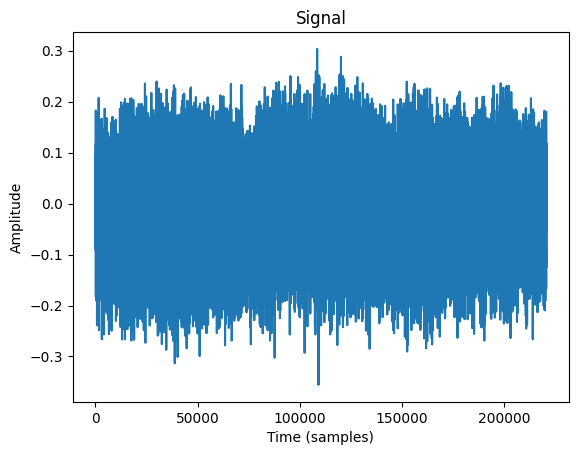

In [128]:
import librosa.display
import matplotlib.pyplot as plt
y, sr = librosa.load(audio_serra_path+audio_serra_clips[10])
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

(40, 431)


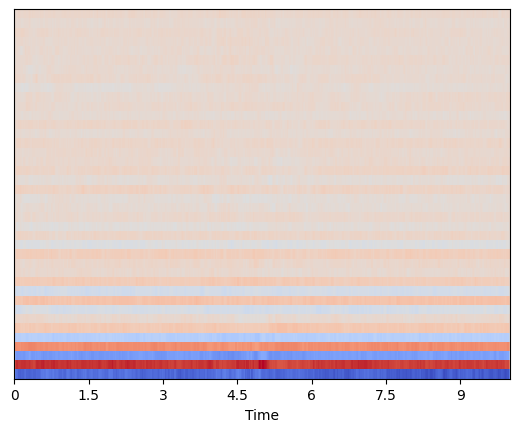

In [131]:
# fig, ax = plt.subplots(nrows=4, ncols=3, sharex=True)

# librosa.display.waveshow(y, sr, ax=ax[i, 0])  # put wave in row i, column 0

mfccs20 = librosa.feature.mfcc(y=y, sr=sr)
librosa.display.specshow(mfccs20, sr=sr, x_axis= z'time')

mfccs128 = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, n_mfcc=40)
librosa.display.specshow(mfccs128, sr=sr, x_axis='time')

mfccs = mfccs128
print(mfccs.shape)

# Salvar valores de espectrograma
 - Pule esse passo se os arquivos já estiverem na pasta

In [71]:
TAMANHO_IMAGEM = 128

#converter o audio para espectrograma:
# é nesse amplitude_to_dB que ele está convertendo para pressão sonora. Podemos explorar outras ponderações aqui. Se não tiver implementado, podemos implementar.
def gerar_espectrograma(y, sr):
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=TAMANHO_IMAGEM)
    # mel_spect = librosa.power_to_db(mfccs, ref=librosa.feature.mfcc(S=librosa.power_to_db(S))np.max)
    return mfccs


def cortar_espectrograma(spectrogram, tam_corte=TAMANHO_IMAGEM):
    tam_total = spectrogram.shape[1]

    # Cortamos o trecho desejado na região do meio do áudio
    inicio = tam_total // 2 - (tam_corte // 2)
    fim = tam_total // 2 + (tam_corte // 2)
    
    return spectrogram[:, inicio:fim]


In [72]:

# Salvar espectrogramas na pasta específica (carros, serras etc)
def salvar_espectrogtramas (audio_clips, audio_path, spectrogram_path, audios_por_arquivo=50):
    numero_audios = len(audio_clips)
    num_arquivo = 1

    spectrogram_values = []
    
    for i, audio_name in enumerate(audio_clips):
        y, sr = librosa.load( os.path.join(audio_path, audio_name) )
        audio_name = audio_name.replace(".mp3", ".csv")

        fullpath = os.path.join(spectrogram_path, audio_name)
        try:
            mfcc_spec = gerar_espectrograma(y, sr)
            mfcc_spec = cortar_espectrograma(mfcc_spec)
            
            # Salva o arquivo e começa o próximo
            np.savetxt(fullpath, mfcc_spec, delimiter=",")
            print("Arquivo %s salvo com sucesso." % fullpath)
                
        except Exception as e:
            print( "Erro ao salvar %s: %s." % (fullpath, e) )


salvar_espectrogtramas(audio_carro_clips, audio_carro_path, spec_carro_path)

salvar_espectrogtramas(audio_moto_clips, audio_moto_path, spec_moto_path)

salvar_espectrogtramas(audio_serra_clips, audio_serra_path, spec_serra_path)


Arquivo ./audioset/mfcc_vetor/carros/#5) Project ForkenSwift electric car： shifting gears-Liqv3KgXThk.csv salvo com sucesso.
Arquivo ./audioset/mfcc_vetor/carros/$150 car jump-1aCyNnYNWvA.csv salvo com sucesso.
Arquivo ./audioset/mfcc_vetor/carros/'87 Honda Mugen Motul Civic Si Race Car at Costa Di Almafi GT4-28SbkfcA6kE.csv salvo com sucesso.
Arquivo ./audioset/mfcc_vetor/carros/'０７ STREET CAR SHOW  ＃６ 大黒２--NBRp5qsrYQ.csv salvo com sucesso.
Arquivo ./audioset/mfcc_vetor/carros/(16) Car Cam： 2 mobile speed cameras, speed racer & scenic esplanade route-2JAjo7yVCgs.csv salvo com sucesso.
Arquivo ./audioset/mfcc_vetor/carros/(HD) - Forza 4 - Top Gear - Car Test - 1967 Chevrolet Corvette Stingray 427--v2FkuCVLjo.csv salvo com sucesso.
Arquivo ./audioset/mfcc_vetor/carros/(HD) - Forza 4 - Top Gear - Car Test - 1980 Lotus Esprit Turbo-1Z3ciuA3Y3o.csv salvo com sucesso.
Arquivo ./audioset/mfcc_vetor/carros/(HD) - Forza 4 - Top Gear - Car Test - 1982 DeLorean DMC-12-1zjyiznZSPY.csv salvo com s

# Treinamento e teste de rede neural

In [73]:
# Carregar espectrogramas com uma CNN e classificar entre "motosserras e não motosserras"

espectrogramas_carro = sorted(os.listdir(spec_carro_path))
espectrogramas_moto = sorted(os.listdir(spec_moto_path))
espectrogramas_serra = sorted(os.listdir(spec_serra_path))

spectrogram_list = []
labels = []

def adicionar_rotulos_spec(espectrogramas, spec_path, label):
    for filename in espectrogramas:
        full_filename = os.path.join(spec_path, filename)  
        spectrogram = np.loadtxt(full_filename, delimiter=",")
        spectrogram_list.append(spectrogram)
        # 0 corresponde aos carros e motos
        labels.append(label)
        

adicionar_rotulos_spec(espectrogramas_carro, spec_carro_path, 0)
adicionar_rotulos_spec(espectrogramas_moto, spec_moto_path, 0)
adicionar_rotulos_spec(espectrogramas_serra, spec_serra_path, 1)

X_train, X_test, y_train, y_test = train_test_split(
    np.array(spectrogram_list), np.array(labels), test_size=0.2  # , random_state=42
)

In [74]:
model = Sequential()
model.add(Conv1D(16, 3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics='accuracy')
model.summary()
model.fit(X_train, y_train, epochs=30)

# model = Sequential()
# model.add(Conv1D(64, 3, activation='relu', padding='same' ,input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Dropout(0.1))
# model.add(Conv1D(32 , 3, activation='relu', padding='same'))
# model.add(MaxPooling1D(pool_size=1))
# model.add(TimeDistributed(Flatten()))
# model.add(LSTM(100, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# 
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
# model.summary()
# model.fit(X_train, y_train, epochs=10)#, batch_size=64)

y_pred = model.predict(X_test)[:, 0]
y_pred = np.round(y_pred)
acc = len(np.where(y_pred == y_test)[0]) / len(y_test)
print("Acurácia:", acc)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_102 (Conv1D)         (None, 126, 16)           6160      
                                                                 
 max_pooling1d_100 (MaxPool  (None, 63, 16)            0         
 ing1D)                                                          
                                                                 
 conv1d_103 (Conv1D)         (None, 61, 32)            1568      
                                                                 
 max_pooling1d_101 (MaxPool  (None, 30, 32)            0         
 ing1D)                                                          
                                                                 
 conv1d_104 (Conv1D)         (None, 28, 64)            6208      
                                                                 
 max_pooling1d_102 (MaxPool  (None, 14, 64)          